# Heart Disease Prediction

In [6]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [7]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [8]:
#import dataset
heart_df = pd.read_csv('heart.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1215 non-null   object
 1   sex       1215 non-null   object
 2   cp        1215 non-null   object
 3   trestbps  1215 non-null   object
 4   chol      1215 non-null   object
 5   fbs       1215 non-null   object
 6   restecg   1215 non-null   object
 7   thalach   1215 non-null   object
 8   exang     1215 non-null   object
 9   oldpeak   1215 non-null   object
 10  slope     1215 non-null   object
 11  ca        1215 non-null   object
 12  thal      1215 non-null   object
 13  target    1215 non-null   object
dtypes: object(14)
memory usage: 133.0+ KB


In [10]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215
unique,42,3,5,50,153,3,4,92,3,41,4,6,5,3
top,58,1,0,120,204,0,1,162,0,0,2,0,2,1
freq,76,828,572,148,24,1032,608,44,816,396,568,700,664,660


In [11]:
heart_df.shape

(1215, 14)

# Checking null values

In [12]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
heart_df.notnull().sum()

age         1215
sex         1215
cp          1215
trestbps    1215
chol        1215
fbs         1215
restecg     1215
thalach     1215
exang       1215
oldpeak     1215
slope       1215
ca          1215
thal        1215
target      1215
dtype: int64

In [14]:
heart_df.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target      object
dtype: object

# Exploratory Data Analysis(EDA)

In [15]:
#Plotting the distribution plot.
# plt.figure(figsize=(20,25))
# plotnumber=1

# for column in heart_df:
#     if plotnumber<14:
#         ax=plt.subplot(4,4,plotnumber)
#         sns.distplot(heart_df[column])
#         plt.xlabel(column,fontsize=20)
#         plt.ylabel('Values',fontsize=20)
#     plotnumber+=1
# plt.show()

plt.figure(figsize=(20, 25))
plotnumber = 1

# Select only numerical columns
numerical_columns = heart_df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    if plotnumber < 14:  # Ensure the subplot grid fits within the figure
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(heart_df[column], kde=True)  # `sns.distplot` is deprecated, use `sns.histplot`
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Values', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

<Figure size 2000x2500 with 0 Axes>

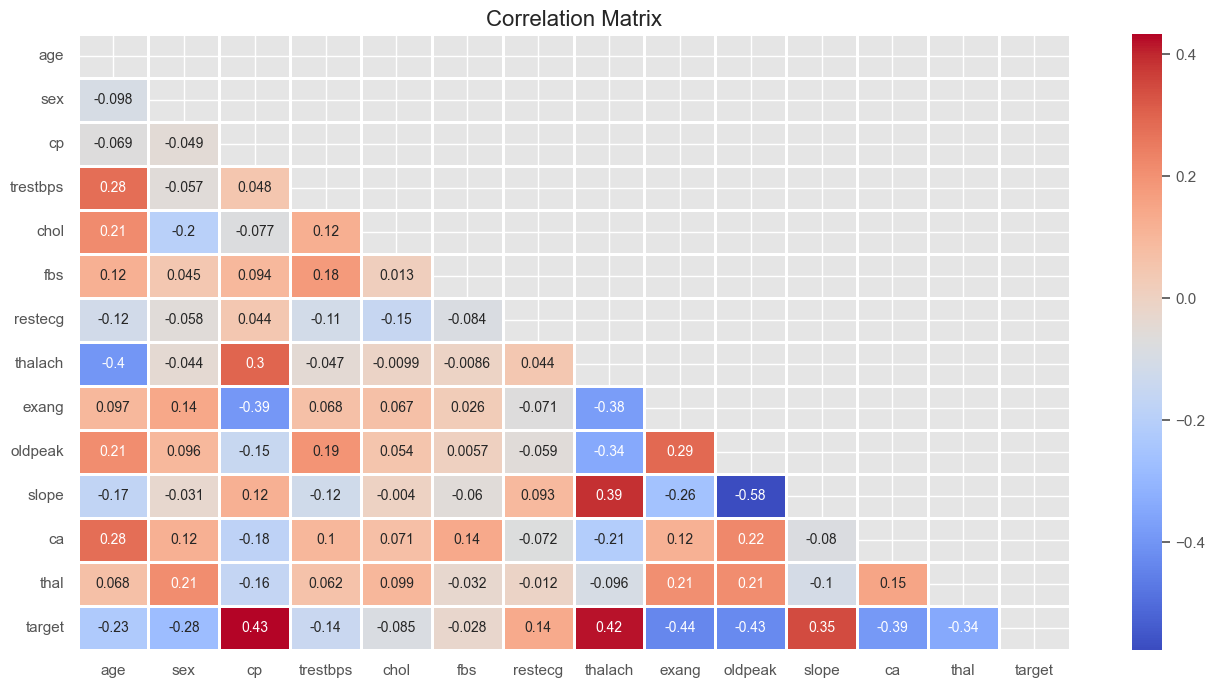

In [16]:
#Correlation matrix

# plt.figure(figsize = (16, 8))

# corr = heart_df.corr()
# mask = np.triu(np.ones_like(corr, dtype = bool))
# sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
# plt.show()

# Check data types and convert if necessary
heart_df = heart_df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric where possible

# Drop rows with NaN values (if conversion fails for some rows)
heart_df = heart_df.dropna()

# Calculate correlation matrix
corr = heart_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask to show only lower triangle
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=1, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [17]:
#checking the variance
heart_df.var()

age           82.280220
sex            0.216628
cp             1.062494
trestbps     306.824472
chol        2679.771686
fbs            0.126563
restecg        0.275843
thalach      523.346704
exang          0.220160
oldpeak        1.344756
slope          0.378794
ca             1.043133
thal           0.373954
target         0.248220
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

# Normalization

In [18]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [19]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [21]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, 0 to 1214
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1212 non-null   float64
 1   sex       1212 non-null   float64
 2   cp        1212 non-null   float64
 3   trestbps  1212 non-null   float64
 4   chol      1212 non-null   float64
 5   fbs       1212 non-null   float64
 6   restecg   1212 non-null   float64
 7   thalach   1212 non-null   float64
 8   exang     1212 non-null   float64
 9   oldpeak   1212 non-null   float64
 10  slope     1212 non-null   float64
 11  ca        1212 non-null   float64
 12  thal      1212 non-null   float64
dtypes: float64(13)
memory usage: 132.6 KB


# Logistic Regression

In [23]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 84.7877358490566 %
Testing accuracy score of the model is: 87.08791208791209 %


In [24]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model [[127  31]
 [ 16 190]]
Classification Report               precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       158
         1.0       0.86      0.92      0.89       206

    accuracy                           0.87       364
   macro avg       0.87      0.86      0.87       364
weighted avg       0.87      0.87      0.87       364



# KNearestNeighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 89.03301886792453 %
Testing accuracy score of the model is: 83.79120879120879 %


In [26]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[127  31]
 [ 28 178]]
Classification Report               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       158
         1.0       0.85      0.86      0.86       206

    accuracy                           0.84       364
   macro avg       0.84      0.83      0.83       364
weighted avg       0.84      0.84      0.84       364



# SVM

In [27]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 75.23584905660378 %
Testing accuracy score of the model is: 75.27472527472527 %


In [28]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[108  50]
 [ 40 166]]
Classification Report               precision    recall  f1-score   support

         0.0       0.73      0.68      0.71       158
         1.0       0.77      0.81      0.79       206

    accuracy                           0.75       364
   macro avg       0.75      0.74      0.75       364
weighted avg       0.75      0.75      0.75       364



# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 98.9010989010989 %


In [30]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[154   4]
 [  0 206]]
Classification Report               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       158
         1.0       0.98      1.00      0.99       206

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [31]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [32]:
grid_search.best_score_

np.float64(0.9941176470588236)

In [33]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [34]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [35]:
y_pred4 = dtc2.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc2.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 96.7032967032967 %


In [36]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[154   4]
 [  8 198]]
Classification Report               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       158
         1.0       0.98      0.96      0.97       206

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



In [37]:
# update dictionary
accuracies['DT']=acc4*100
del accuracies['DT2']

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 99.52830188679245 %
Testing accuracy score of the model is: 96.7032967032967 %


In [39]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[153   5]
 [  7 199]]
Classification Report               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       158
         1.0       0.98      0.97      0.97       206

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



# Gradient Boosting

In [40]:
# from sklearn.ensemble import GradientBoostingClassifier

# gbc = GradientBoostingClassifier()

# gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
# gbc.fit(x_train, y_train)

# y_pred6 = gbc.predict(x_test)

# acc6 = accuracy_score(y_test,y_pred6)
# accuracies['GradientBoosting']=acc6*100

# print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
# print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the GradientBoostingClassifier with the learning rate and number of estimators
gbc = GradientBoostingClassifier(learning_rate=0.05, n_estimators=180)

# Fit the model to the training data
gbc.fit(x_train, y_train)

# Make predictions on the test data
y_pred6 = gbc.predict(x_test)

# Calculate the accuracy
acc6 = accuracy_score(y_test, y_pred6)
accuracies['GradientBoosting'] = acc6 * 100

# Print the training and testing accuracy
print("Training accuracy score of the model is:", accuracy_score(y_train, gbc.predict(x_train)) * 100, "%")
print("Testing accuracy score of the model is:", accuracy_score(y_test, y_pred6) * 100, "%")


Training accuracy score of the model is: 98.82075471698113 %
Testing accuracy score of the model is: 95.05494505494505 %


# XGBoost

In [41]:
print("Confusion matrix of the model", confusion_matrix(y_test, y_pred6))
print("Classification Report", classification_report(y_test, y_pred6))


Confusion matrix of the model [[145  13]
 [  5 201]]
Classification Report               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       158
         1.0       0.94      0.98      0.96       206

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.95       364
weighted avg       0.95      0.95      0.95       364



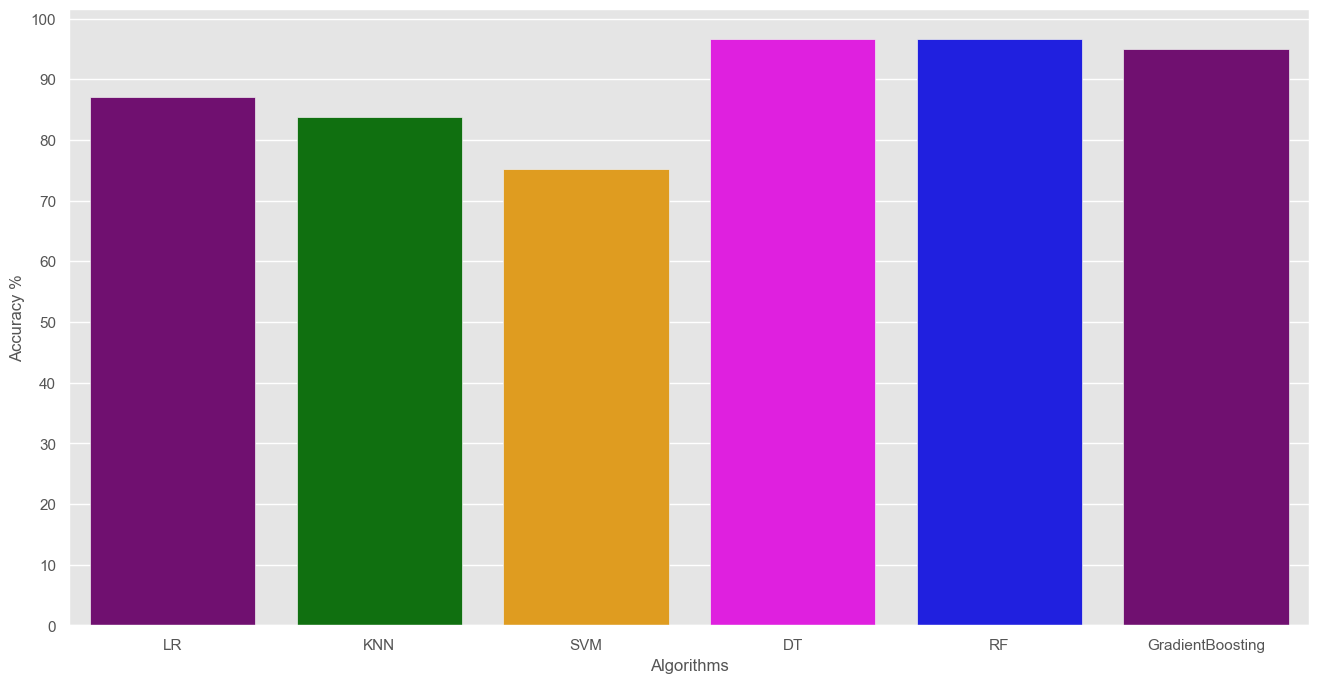

In [42]:
# colors = ["purple", "green", "orange", "magenta","blue","black"]

colors = ["purple", "green", "orange", "magenta","blue"]


# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [44]:
models = pd.DataFrame({
    # 'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],

        'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score': [acc, acc1, acc2, acc4, acc5, acc6]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest,0.967033
3,Decision Tree,0.967033
5,Gradient Boosting,0.950549
0,Logistic Regression,0.870879
1,KNN,0.837912
2,SVM,0.752747


In [45]:
import pickle
model = rfc
pickle.dump(model, open("heart.pkl",'wb'))

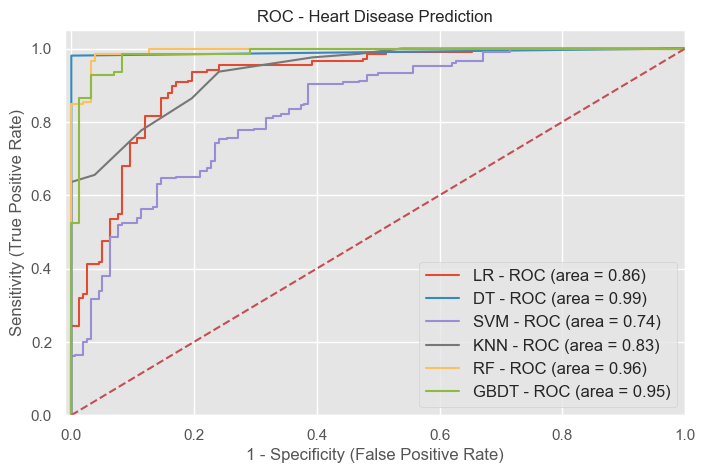

In [47]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[87.09, 96.7, 75.27000000000001, 83.78999999999999, 96.7, 95.05]
[np.float64(86.31), np.float64(100.0), np.float64(74.47), np.float64(83.39), np.float64(96.09), np.float64(94.67)]


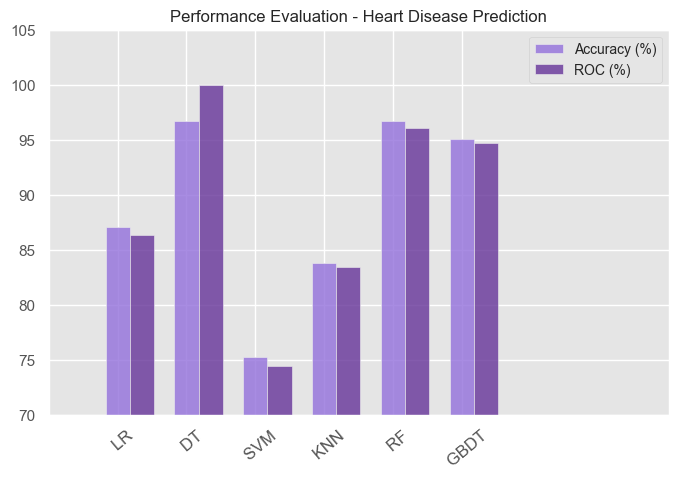

In [50]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(acc,4), 100*round(acc4,4), 100*round(acc2,4), 100*round(acc1,4), 
                  100*round(acc5,4), 100*round(acc6,4)]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 6
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 105])

plt.title('Performance Evaluation - Heart Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()